In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set()

In [2]:
def inv_linear(x,a,b):
    spec_constant = 283.2
    return a/(x-spec_constant) + b
def chi_square_red(x, y, yerr, modelfunc, p_opt):
    numerator = (y - modelfunc(x, *p_opt)) ** 2
    denominator = yerr ** 2
    chi = sum(numerator / denominator)
    chired = chi / (len(y) - len(p_opt))
    return chired
def fitting(function,xdata,ydata,  guess,sigma = 0):
    if type(sigma) is int:
        fit_opt, fit_cov = curve_fit(function,xdata,ydata, p0=guess)
    else:
        fit_opt, fit_cov = curve_fit(function,xdata,ydata, p0=guess, sigma = sigma, absolute_sigma = True)
    return function(xdata,*fit_opt), fit_opt, fit_cov 

In [3]:
helium_data = np.loadtxt('helium.csv', delimiter=',', usecols=(0,1), unpack=True)
spec_constant = 283.2

Text(0.5, 0, 'wavelength (nm)')

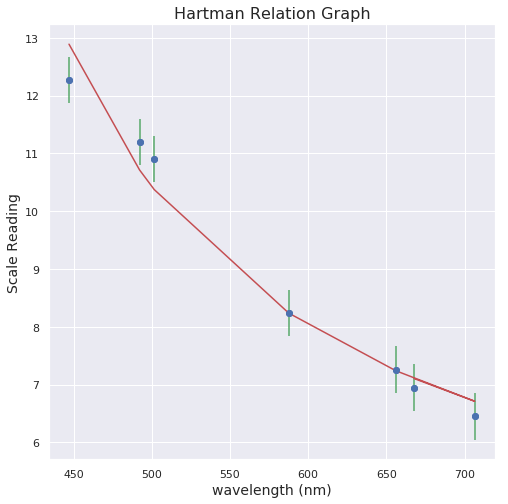

In [27]:
plt.figure(figsize = (8,8))
plt.scatter(helium_data[0],helium_data[1] )
init = (-90,0.3)
errors = np.repeat(0.4, len(helium_data[1]))
fit = fitting(inv_linear,helium_data[0],helium_data[1] ,guess =init, sigma = errors)
plt.plot(helium_data[0], fit[0], c = 'r')
plt.errorbar(helium_data[0],helium_data[1], yerr = errors, ecolor='g', fmt='o', capthick=2)
plt.title('Hartman Relation Graph', fontsize = 16)
plt.ylabel('Scale Reading', fontsize = 14)
plt.xlabel('wavelength (nm)', fontsize = 14)

In [28]:
print(chi_square_red(helium_data[0],helium_data[1], errors, inv_linear, fit[1]))

1.236885715169401


In [5]:
def Hartman(specreading):
    # Function which converts a spectrograph reading to a wavelength
    # input is wavelength in nanometers
    m = fit[1][0]
    b = fit[1][1]
    wavelength = m/(specreading - b) + spec_constant
    return(wavelength)


In [11]:
def Error_Propagation(wavelengths, y_err):
    m = fit[1][0]
    b = fit[1][1]
    spec_constant_err = 0.4
    return np.sqrt(m**2/(wavelengths - b)**2 + spec_constant_err**2)

In [6]:
specreading = float(input("What Did the Spectrograph Say? "))
wavelength = Hartman(specreading)
print('Your wavelength is ' + np.str(np.round(wavelength,2)) + ' nm!')

What Did the Spectrograph Say? 1111
Your wavelength is 284.69 nm!


In [7]:
mystery_data = np.loadtxt('mystery.csv', unpack=True)

In [18]:
wavelengths = Hartman(mystery_data)
error = Error_Propagation(wavelengths, 0.1)
print(wavelengths)
print(error)


[728.34803824 683.09962463 639.93168745 605.17542813 599.62615351
 582.97790329 529.01533945 515.86255575 490.21165759 455.28537344]
[2.31226483 2.46159814 2.62411461 2.77210031 2.79734133 2.87599351
 3.1654822  3.24535339 3.41361799 3.6736219 ]
